In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [333]:
!pip install --upgrade scikit-learn
!pip show imbalanced-learn
!pip install imblearn
!pip install -U imbalanced-learn
!pip install skfeature-chappers
import sklearn
print(sklearn.__version__)

Name: imbalanced-learn
Version: 0.10.1
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: c:\users\apeksha\anaconda3\lib\site-packages
Requires: scikit-learn, numpy, joblib, scipy, threadpoolctl
Required-by: imblearn
1.2.1


In [211]:
df=pd.read_csv("bank (2).csv",sep=";")

In [212]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [213]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [214]:
df.shape

(4521, 17)

In [215]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [217]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [218]:
df.duplicated().sum()

0

In [219]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [220]:
df["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

<AxesSubplot:>

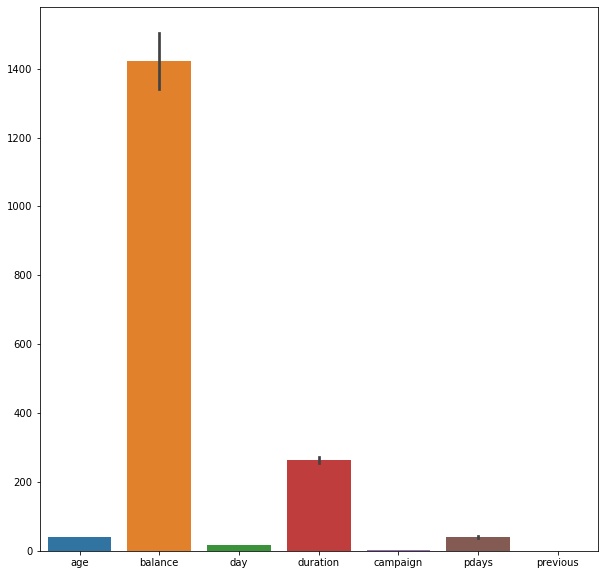

In [221]:
plt.figure(figsize=(10,10))
sns.barplot(data=df)

In [222]:
vis1=pd.crosstab(df.job,df.y)
vis1

y,no,yes
job,,
admin.,420,58
blue-collar,877,69
entrepreneur,153,15
housemaid,98,14
management,838,131
retired,176,54
self-employed,163,20
services,379,38
student,65,19


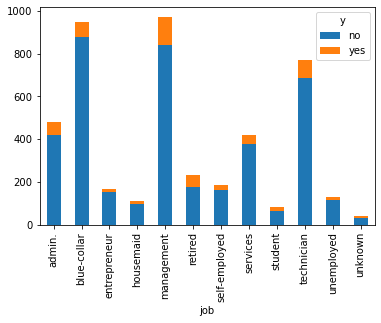

In [223]:
vis1.plot(kind="bar",stacked=True);

In [224]:
vis2=pd.crosstab(df.marital,df.y)
vis2


y,no,yes
marital,,
divorced,451,77
married,2520,277
single,1029,167


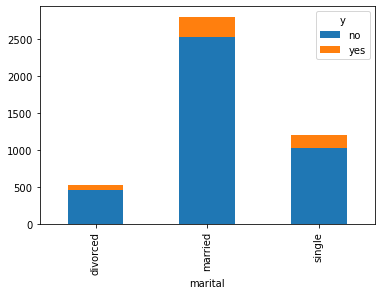

In [225]:
vis2.plot(kind="bar",stacked=True);

In [226]:
vis3=pd.crosstab(df.education,df.y)
vis3


y,no,yes
education,,
primary,614,64
secondary,2061,245
tertiary,1157,193
unknown,168,19


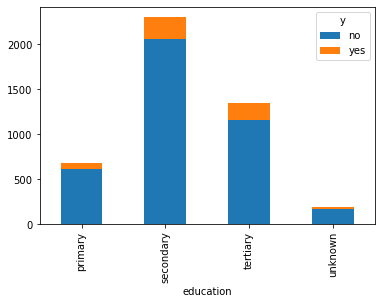

In [227]:
vis3.plot(kind="bar",stacked=True);

In [228]:
vis4=pd.crosstab(df.default,df.y)
vis4


y,no,yes
default,,
no,3933,512
yes,67,9


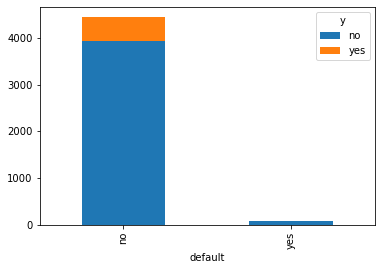

In [229]:
vis4.plot(kind="bar",stacked=True);

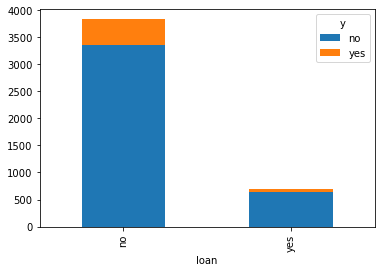

In [230]:
vis5=pd.crosstab(df.loan,df.y)
vis5
vis5.plot(kind="bar",stacked=True);

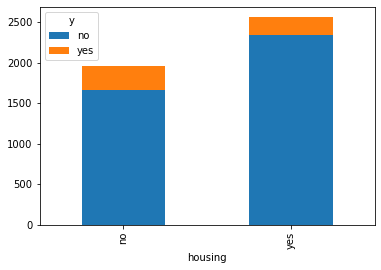

In [231]:
vis6=pd.crosstab(df.housing,df.y)
vis6
vis6.plot(kind="bar",stacked=True);

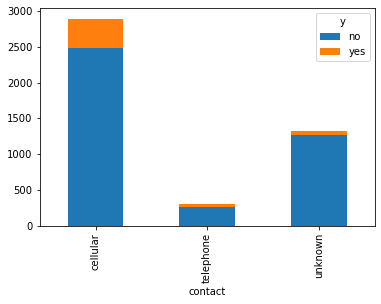

In [232]:
vis7=pd.crosstab(df.contact,df.y)
vis7
vis7.plot(kind="bar",stacked=True);

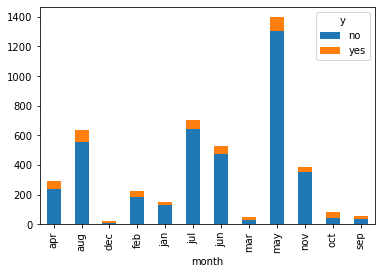

In [233]:
vis8=pd.crosstab(df. month,df.y)
vis8
vis8.plot(kind="bar",stacked=True);

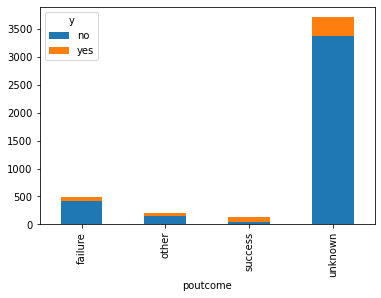

In [234]:
vis9=pd.crosstab(df.poutcome,df.y)
vis9
vis9.plot(kind="bar",stacked=True);

C:\Users\Apeksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

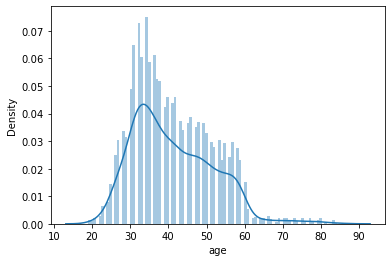

In [235]:
sns.distplot(df.age,hist=True,kde=True,bins=int(100))

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


C:\Users\Apeksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

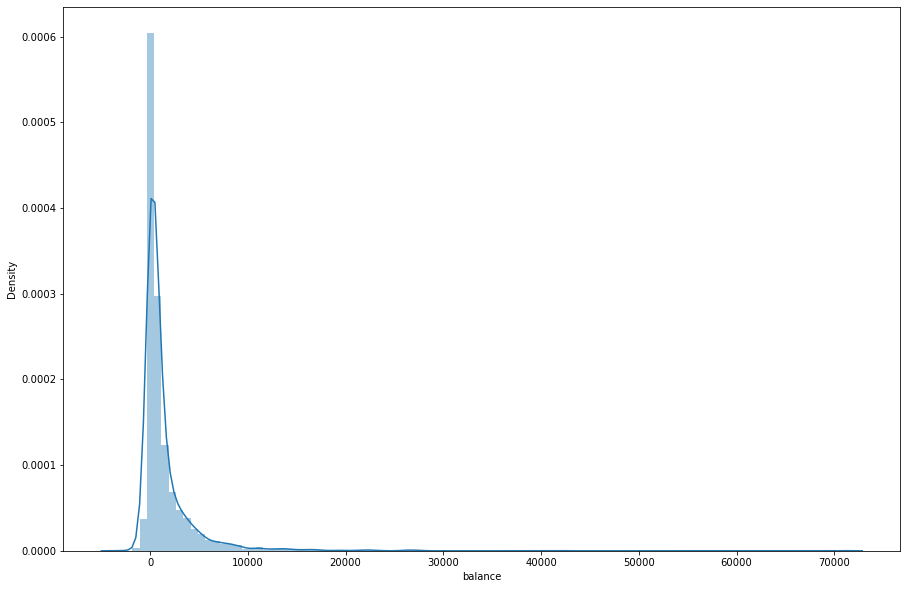

In [237]:
plt.figure(figsize=(15,10))
sns.distplot(df.balance,hist=True,kde=True,bins=int(100))

C:\Users\Apeksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

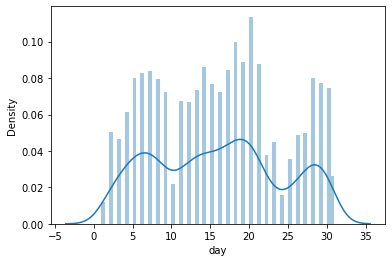

In [238]:
sns.distplot(df.day,hist=True,kde=True,bins=int(60))

C:\Users\Apeksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

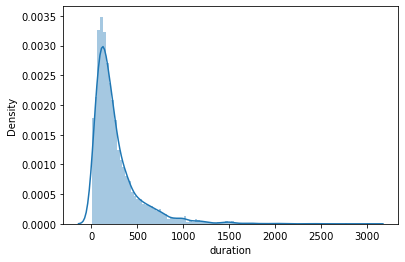

In [239]:
sns.distplot(df.duration ,hist=True,kde=True,bins=int(100))

C:\Users\Apeksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='campaign', ylabel='Density'>

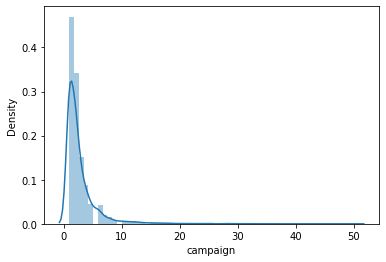

In [240]:
sns.distplot(df.campaign ,hist=True,kde=True,bins=int(60))

C:\Users\Apeksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pdays', ylabel='Density'>

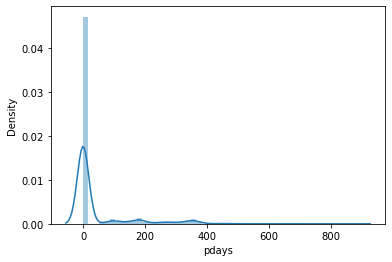

In [241]:
sns.distplot(df.pdays,hist=True,kde=True,bins=int(50))

C:\Users\Apeksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='previous', ylabel='Density'>

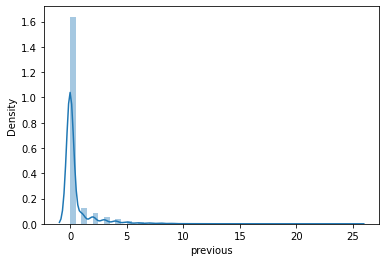

In [242]:
sns.distplot(df.previous,hist=True,kde=True)

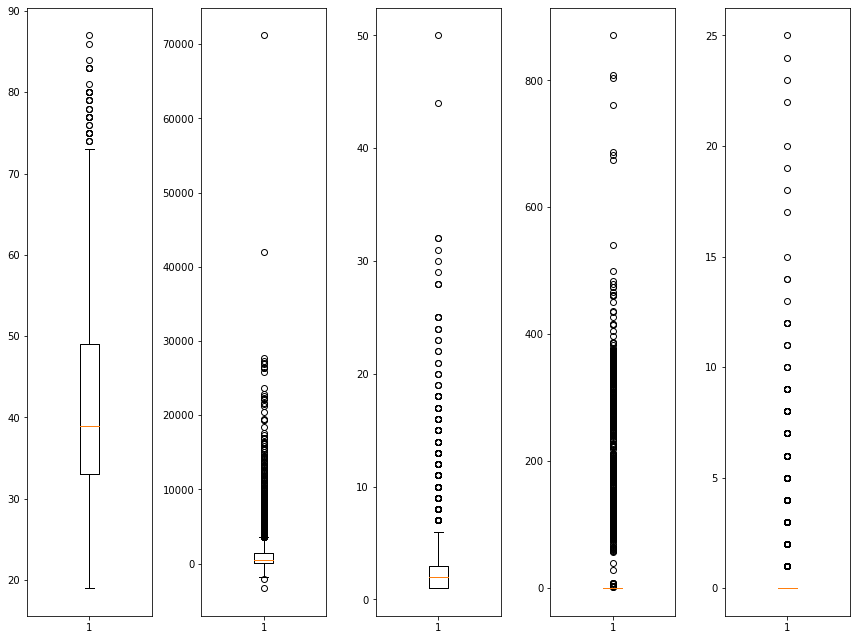

In [243]:
plt.figure(figsize=(12,9))
plt.subplot(151)
plt.boxplot(df.age)
plt.subplot(152)
plt.boxplot(df.balance)
plt.subplot(153)
plt.boxplot(df.campaign)
plt.subplot(154)
plt.boxplot(df.pdays)
plt.subplot(155)
plt.boxplot(df.previous)
plt.tight_layout()

In [244]:
df.groupby(["housing","loan"],as_index=False)["age"].mean()

,housing,loan,age
0,no,no,43.470483
1,no,yes,43.754386
2,yes,no,39.468184
3,yes,yes,38.879310


<AxesSubplot:xlabel='marital,y'>

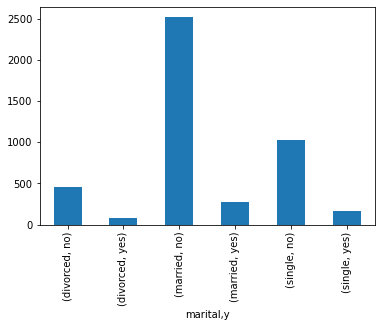

In [245]:
df.groupby(["marital","y"])["age"].count().plot(kind = "bar")

In [246]:
df1=df.copy()

In [247]:
df1.drop(["day","month"],axis =1, inplace = True)

In [248]:
import numpy as np
for i in df1.columns:
    df1[i] = np.where(df1[i] == "unknown", np.nan, df1[i])
df1.isna().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [249]:
(3705/df1.poutcome.shape[0])*100


81.95089581950896

In [250]:
(1324/df1.contact.shape[0])*100

29.285556292855563

In [251]:
df1.drop("poutcome", inplace = True, axis = 1)
df1.drop("contact", inplace = True, axis = 1)

In [252]:
df1["job"].fillna(method = "ffill",inplace=True)
df1["education"].fillna(method = "ffill",inplace= True)

In [253]:
varlist=["default",'housing','y']

In [254]:
def binary_map(q):
    return q.map({'yes':1,'no':0})

In [255]:
df1[varlist]=df1[varlist].apply(binary_map)
df1.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,0,1787.0,0,no,79.0,1.0,-1.0,0.0,0
1,33.0,services,married,secondary,0,4789.0,1,yes,220.0,1.0,339.0,4.0,0
2,35.0,management,single,tertiary,0,1350.0,1,no,185.0,1.0,330.0,1.0,0
3,30.0,management,married,tertiary,0,1476.0,1,yes,199.0,4.0,-1.0,0.0,0
4,59.0,blue-collar,married,secondary,0,0.0,1,no,226.0,1.0,-1.0,0.0,0


In [256]:
df1["education"].replace({'primary':0, 'secondary':1, 'tertiary':2},inplace = True)
#df1["default"].replace({'no':0, 'yes':1},inplace = True)
df1["marital"].replace({'single':0, 'married':1, 'divorced':2},inplace = True)
#df1["housing"].replace({'no':0, 'yes':1},inplace = True)
df1["loan"].replace({'no':0, 'yes':1},inplace = True)

In [257]:
df1["education"].replace({'primary':0, 'secondary':1, 'tertiary':2},inplace = True)
#df1["default"].replace({'no':0, 'yes':1},inplace = True)
df1["marital"].replace({'single':0, 'married':1, 'divorced':2},inplace = True)

In [258]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
ohe = OneHotEncoder()
df1[list(df1["job"].unique())] = ohe.fit_transform(df1[["job"]]).A
df1.drop("job",axis = 1, inplace = True)
df1.head()


,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired
0,30.0,1,0,0,1787.0,0,0,79.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33.0,1,1,0,4789.0,1,1,220.0,1.0,339.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35.0,0,2,0,1350.0,1,0,185.0,1.0,330.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,1,2,0,1476.0,1,1,199.0,4.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59.0,1,1,0,0.0,1,0,226.0,1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
!pip install -U scikit-learn

from sklearn.ensemble import RandomForestClassifier



#from xgboost import XGBClassifier
#from sklearn.linear_model import LogisticRegression
#from imblearn.combine import SMOTEENN

In [260]:
!pip install xgboost
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN

In [261]:
label = LabelEncoder()
df1["y"] =  label.fit_transform(df1["y"])
df1.head(1)

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired
0,30.0,1,0,0,1787.0,0,0,79.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


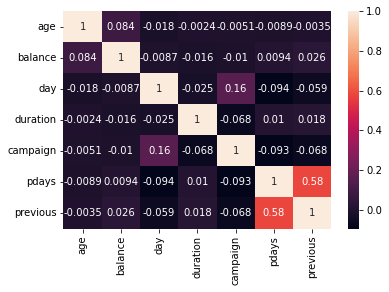

In [262]:
corr=df.corr()
count=sns.heatmap(corr,annot=True)

<AxesSubplot:>

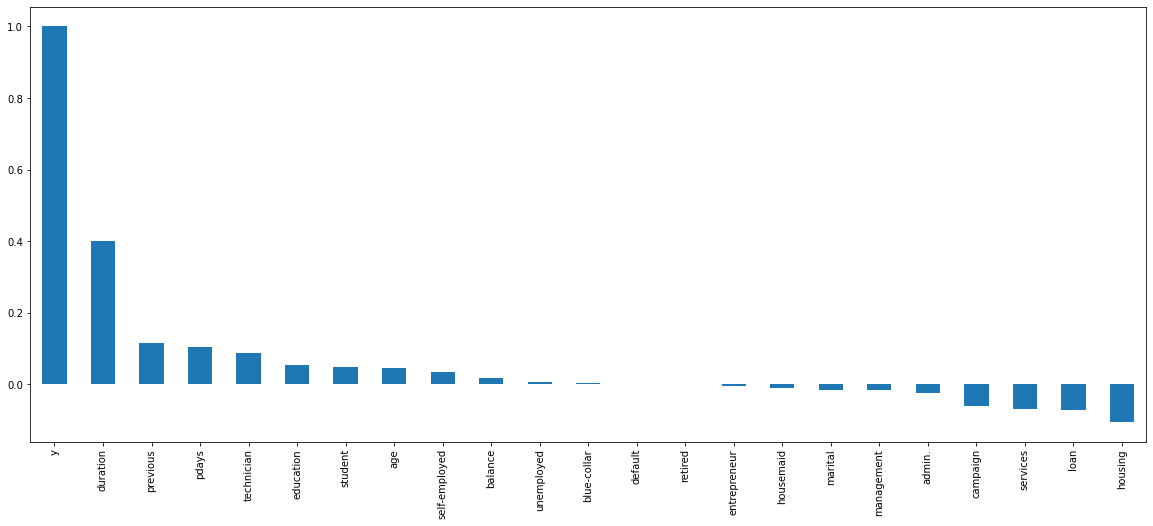

In [263]:
plt.figure(figsize=(20,8))
df1.corr()['y'].sort_values(ascending = False).plot(kind='bar')

In [264]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
arr = std.fit_transform(x_train)
std_x = pd.DataFrame(arr, columns = x_train.columns)
std_x.head()

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired
0,-1.055486,-1.417750,1.276396,-0.132080,1.965543,-1.149963,-0.427620,0.008601,-0.259660,-0.405785,...,-0.508972,-0.203653,-0.157935,-0.518862,-0.230881,-0.208755,-0.324244,7.334022,-0.457122,-0.166903
1,0.366687,1.895067,-1.713852,7.571168,-0.541508,0.869593,2.338524,-0.666772,-0.578156,-0.405785,...,-0.508972,-0.203653,-0.157935,-0.518862,-0.230881,-0.208755,-0.324244,-0.136351,-0.457122,5.991491
2,-1.719166,-1.417750,-0.218728,-0.132080,-0.459468,-1.149963,-0.427620,0.558057,-0.578156,-0.405785,...,-0.508972,-0.203653,-0.157935,-0.518862,-0.230881,-0.208755,-0.324244,-0.136351,-0.457122,-0.166903
3,0.840744,1.895067,-0.218728,-0.132080,-0.478525,0.869593,2.338524,1.645522,-0.259660,2.524970,...,-0.508972,-0.203653,-0.157935,-0.518862,-0.230881,-0.208755,-0.324244,-0.136351,2.187601,-0.166903
4,1.504425,0.238658,-1.713852,-0.132080,-0.403268,-1.149963,-0.427620,-0.140210,0.058837,-0.405785,...,1.964743,-0.203653,-0.157935,-0.518862,-0.230881,-0.208755,-0.324244,-0.136351,-0.457122,-0.166903


In [265]:
X = df1.drop("y",axis=1)
y = df1['y']
X.shape

(4521, 22)

In [266]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [267]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [268]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [269]:
model_dt.score(x_test,y_test)


0.8972375690607735

In [270]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       809
           1       0.52      0.39      0.44        96

    accuracy                           0.90       905
   macro avg       0.73      0.67      0.69       905
weighted avg       0.89      0.90      0.89       905



In [271]:
print(metrics.confusion_matrix(y_test, y_pred))

[[775  34]
 [ 59  37]]


In [272]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [273]:
#import imblearn
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(sampling_strategy=0.75)

#X_resampled, y_resampled = sm.fit_resample(X,y)

In [274]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [275]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state =100,max_depth=6, min_samples_leaf=8)

In [276]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9116161616161617
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       539
           1       0.93      0.91      0.92       649

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



In [277]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[494  45]
 [ 60 589]]


In [278]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [279]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [280]:
y_pred=model_rf.predict(x_test)

In [281]:
model_rf.score(x_test,y_test)

0.8972375690607735

In [282]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       809
           1       1.00      0.03      0.06        96

    accuracy                           0.90       905
   macro avg       0.95      0.52      0.50       905
weighted avg       0.91      0.90      0.85       905



In [283]:
print(metrics.confusion_matrix(y_test, y_pred))

[[809   0]
 [ 93   3]]


In [284]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled, y_resampled,test_size=0.2)


In [285]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [286]:
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.92003367003367
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       572
           1       0.90      0.95      0.92       616

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188



In [287]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[510  62]
 [ 33 583]]


In [288]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [289]:
model_xg_smote=XGBClassifier(n_estimators=100, random_state = 100)
model_xg_smote.fit(xr_train2,yr_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

In [290]:
yr_predict2 = model_xg_smote.predict(xr_test2)

In [291]:
model_score_r2 = model_xg_smote.score(xr_test2, yr_test2)

In [292]:
print(model_score_r2)
print(metrics.classification_report(yr_test2, yr_predict2))
print(metrics.confusion_matrix(yr_test2, yr_predict2))

0.9713804713804713
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       540
           1       0.98      0.97      0.97       648

    accuracy                           0.97      1188
   macro avg       0.97      0.97      0.97      1188
weighted avg       0.97      0.97      0.97      1188

[[526  14]
 [ 20 628]]


In [293]:
xr_train3,xr_test3,yr_train3,yr_test3=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [294]:
model_lr_smote=LogisticRegression( random_state = 100)
model_lr_smote.fit(xr_train3,yr_train3)

C:\Users\Apeksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

In [295]:
LogisticRegression(random_state=100)
yr_predict3 = model_lr_smote.predict(xr_test3)
model_score_r3 = model_lr_smote.score(xr_test3, yr_test3)

In [296]:
print(model_score_r3)
print(metrics.classification_report(yr_test3, yr_predict3))
print(metrics.confusion_matrix(yr_test3, yr_predict3))

0.8872053872053872
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       566
           1       0.91      0.88      0.89       622

    accuracy                           0.89      1188
   macro avg       0.89      0.89      0.89      1188
weighted avg       0.89      0.89      0.89      1188

[[509  57]
 [ 77 545]]


In [297]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train2)
xr_test_pca = pca.transform(xr_test2)
explained_variance = pca.explained_variance_ratio_

In [298]:
model_xg_smote_pca=XGBClassifier(n_estimators=100, random_state = 100)
model_xg_smote_pca.fit(xr_train_pca,yr_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

In [299]:
yr_predict_pca = model_xg_smote_pca.predict(xr_test_pca)
model_score_r_pca = model_xg_smote_pca.score(xr_test_pca, yr_test2)
print(model_score_r_pca)
print(metrics.classification_report(yr_test2, yr_predict_pca))

0.632996632996633
              precision    recall  f1-score   support

           0       0.60      0.57      0.58       540
           1       0.66      0.69      0.67       648

    accuracy                           0.63      1188
   macro avg       0.63      0.63      0.63      1188
weighted avg       0.63      0.63      0.63      1188



In [300]:
print(metrics.confusion_matrix(yr_test1, yr_predict_pca))

[[253 319]
 [257 359]]


In [301]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [302]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)

In [303]:
scores = cross_val_score(model_xg_smote,xr_train2,yr_train2, cv=kfold)

In [304]:
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 96.67% (1.00%)


In [305]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [306]:
params = {
    "n_estimators": randint(50, 500),
    "max_depth": randint(2, 10),
    "learning_rate": uniform(0.01, 0.3),
    "colsample_bytree": uniform(0.3, 0.7),
    "subsample": uniform(0.3, 0.7),
    "gamma": uniform(0, 0.5),
    "reg_lambda": uniform(0, 2),
}

In [307]:
rs = RandomizedSearchCV(model_xg_smote, params, cv=5, random_state=42, n_jobs=-1)

In [308]:
rs.fit(xr_train2,yr_train2)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012CE6972130>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012CE6CCE0D0>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012CE6CCEFD0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000012CE2B67580>},
                   random_state=42)

In [309]:
y_pred = rs.predict(xr_test2)

In [310]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(yr_test2, y_pred)

In [311]:
print("Best hyperparameters: ", rs.best_params_)
print("Accuracy: ", accuracy)

Best hyperparameters:  {'colsample_bytree': 0.46162567793550424, 'gamma': 0.12051273301300586, 'learning_rate': 0.21497905564763747, 'max_depth': 5, 'n_estimators': 313, 'reg_lambda': 0.06877704223043679, 'subsample': 0.9365242814551473}
Accuracy:  0.9722222222222222


In [312]:
model_xg_smote=XGBClassifier(colsample_bytree = 0.3406585285177396, gamma = 0.4330880728874676, learning_rate = 0.19033450352296263, max_depth = 9, n_estimators= 180, reg_lambda = 0.041168988591604894, subsample= 0.978936896513396)
model_xg_smote.fit(xr_train2,yr_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3406585285177396, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4330880728874676, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.19033450352296263, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [313]:
yr_predict4 = model_xg_smote.predict(xr_test2)

In [314]:
model_score_r4 = model_xg_smote.score(xr_test2, yr_test2)

In [315]:
print(model_score_r4)
print(metrics.classification_report(yr_test2, yr_predict4))
print(metrics.confusion_matrix(yr_test2, yr_predict4))

0.9713804713804713
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       540
           1       0.98      0.96      0.97       648

    accuracy                           0.97      1188
   macro avg       0.97      0.97      0.97      1188
weighted avg       0.97      0.97      0.97      1188

[[529  11]
 [ 23 625]]


In [316]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)

In [317]:
scores = cross_val_score(model_xg_smote,xr_train2,yr_train2, cv=kfold)

In [318]:
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 96.76% (0.96%)


In [319]:
model_score_r4 = model_xg_smote.score(xr_test2, yr_test2)

In [320]:
print(model_score_r4)
print(metrics.classification_report(yr_test2, yr_predict4))
print(metrics.confusion_matrix(yr_test2, yr_predict4))

0.9713804713804713
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       540
           1       0.98      0.96      0.97       648

    accuracy                           0.97      1188
   macro avg       0.97      0.97      0.97      1188
weighted avg       0.97      0.97      0.97      1188

[[529  11]
 [ 23 625]]


In [321]:
accuracy = accuracy_score(yr_test2, yr_predict4)
print("Accuracy: ", accuracy)

Accuracy:  0.9713804713804713


In [322]:
from sklearn.metrics import roc_auc_score,roc_curve

In [323]:
y_pred_prob = model_xg_smote.predict_proba(xr_test2)[:,1]

In [324]:
auc_roc = roc_auc_score(yr_test2, y_pred_prob)
print("AUC-ROC Score: ", auc_roc)

AUC-ROC Score:  0.9949216963877456


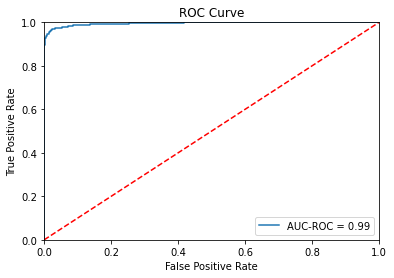

In [325]:
fpr, tpr, thresholds = roc_curve(yr_test2, y_pred_prob)
plt.plot(fpr, tpr,label='AUC-ROC = %0.2f' % auc_roc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()